In [1]:
import flaremodel as fm
import numpy as np
import matplotlib.pyplot as plt
SAVE_PLOT = True

In [2]:
R = 2*fm.SgrA().Rs # size of the sphere, will be modified if there is expansion
V = 4/3*np.pi*R**3
n_e = 6e10
B = 10.
exp_b = 0.02
ts = R/fm.c/exp_b*np.array([0, 1.5, 3., 4.5])

g_min = 20.
g_max = 1e5
p = 2.
edist = "powerlaw"

nus = np.logspace(9, 20, 100)

params = [p, g_min, g_max]

e_pl_fun = lambda gamma, ne: np.piecewise(gamma, [np.logical_and(gamma < g_max, gamma > g_min)],
                                            [lambda gamma: fm.eDist(gamma, ne, params, edist), 0.]) 

In [3]:
nu_m_fun = lambda R, nu_m, R0: nu_m*(R/R0)**(-(4*p+6)/(p+4))
S_m_fun = lambda R, S_m, R0: S_m*(R/R0)**(-(7*p+3)/(p+4))

In [4]:
t_edist = fm.vdLEdist(sync_cool=True)
t_edist_off = fm.vdLEdist(sync_cool=False)
t_edist.e_dist_fun = e_pl_fun
t_edist_off.e_dist_fun = e_pl_fun

In [5]:
Rs, Bs, e_dist = t_edist.get_ngamma(ts, n_e*V, B, R, exp_b, 1)
Rs, Bs, e_dist_off = t_edist_off.get_ngamma(ts, n_e*V, B, R, exp_b, 1)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


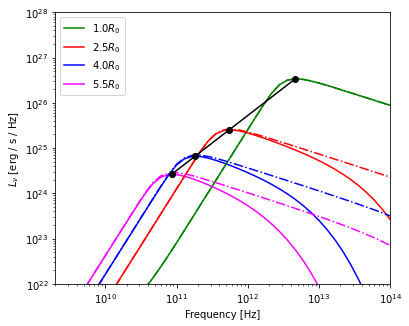

In [6]:
geo_user = fm.HomogeneousSphereUserdist()
cs = ["green", "red", "blue", "magenta"]
plt.figure(figsize=(6,5))

for i in range(ts.shape[0]):
    syn = geo_user.compute_synchrotron(nus, e_dist[i,:], [Rs[i], -1], Bs[i], t_edist._gamma)
    plt.loglog(nus, syn, linestyle="-", color=cs[i], label=r"%.1f$R_0$" % (Rs[i]/R))
    if i == 0:
        nu_m_0 = nus[np.argmax(syn)] 
        S_m_0 = np.max(syn)
    
for i in range(ts.shape[0]):
    syn = geo_user.compute_synchrotron(nus, e_dist_off[i,:], [Rs[i], -1], Bs[i], t_edist._gamma)
    plt.loglog(nus, syn, linestyle="-.", color=cs[i])
        
plt.plot(nu_m_fun(Rs, nu_m_0, R), S_m_fun(Rs, S_m_0, R), 'ko-')

plt.legend(loc=2)
plt.ylabel(r"$L_\nu$ [erg / s / Hz]")
plt.xlabel(r"Frequency [Hz]")
plt.ylim([1e22, 1e28])
plt.xlim([2e9, 1e14])
if SAVE_PLOT: plt.savefig("vdL_single.eps", bbox_inches="tight", dpi=300)